In [1]:
%reset -f
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import seaborn as sns
import plotly
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon
from pandas_profiling import ProfileReport
pd.set_option('max_columns', 20)
pd.set_option('max_rows', 20)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
engine = create_engine("sqlite:////Users/nathanieldirenzo/Documents/GitHub/NBM_EDA_Student/resources/get_mta/mta_data.db")

In [3]:
df = pd.read_sql('SELECT * FROM mta_data LIMIT 250000;', engine)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270


In [4]:
#profile = ProfileReport(df)
#profile

In [5]:
df = df.rename(columns={'C/A': 'control_area', 'UNIT': 'unit', 'SCP': 'subunit_channel_pos', 'STATION':'station', 'LINENAME':'subway_lines', 'DIVISION':'division', 'DATE':'date', 'TIME':'time', 'DESC':'desc', 'ENTRIES':'entries', 'EXITS':'exits'})

In [6]:
df.head()

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,03:00:00,REGULAR,7672966,2645023
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,07:00:00,REGULAR,7672969,2645040
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,11:00:00,REGULAR,7672991,2645127
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,15:00:00,REGULAR,7673037,2645193
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/18/2021,19:00:00,REGULAR,7673097,2645270


In [44]:
df.station.value_counts()

FULTON_ST          4208
GRD_CNTRL_42_ST    3350
34_ST_PENN_STA     3231
CORTLANDT_ST       3183
23_ST              3057
                   ... 
FOREST_AVE           76
CRESCENT_ST          76
191_ST               73
YORK_ST              65
CLEVELAND_ST         54
Name: station, Length: 377, dtype: int64

In [7]:
df['date'] = df['date'].str.replace('/','_')
df['time'] = df['time'].str.replace(':','_')
df['desc'] = df['desc'].str.replace(' ', '_')
df['subunit_channel_pos'] = df['subunit_channel_pos'].str.replace('-', '_')
df['station'] = df['station'].str.replace('-', '_')
df['station'] = df['station'].str.replace(' ', '_')
df['station'] = df['station'].str.replace('/','_')

In [8]:
df['unique_id'] = df['control_area'] + '_' + df['unit'] + '_' + df['subunit_channel_pos'] + '_' + df['station'] + '_' + df['date'] + '_' + df['time'] + '_' + df['desc']

In [9]:
df = df.set_index('unique_id')

In [10]:
df['date_time'] = df.date + ' ' + df.time

In [11]:
df.date_time = pd.to_datetime(df['date_time'], format = '%m_%d_%Y %H_%M_%S')

In [12]:
df.sample(20)

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time
unique_id,,,,,,,,,,,,
PTH11_R545_00_00_01_14TH_STREET_12_23_2021_10_36_39_REGULAR,PTH11,R545,00_00_01,14TH_STREET,1,PTH,12_23_2021,10_36_39,REGULAR,274508,11144,2021-12-23 10:36:39
H026_R137_00_03_03_MYRTLE_WYCKOFF_12_17_2021_19_00_00_REGULAR,H026,R137,00_03_03,MYRTLE_WYCKOFF,LM,BMT,12_17_2021,19_00_00,REGULAR,5087491,412096,2021-12-17 19:00:00
H001_R175_00_00_02_8_AV_12_19_2021_20_00_00_REGULAR,H001,R175,00_00_02,8_AV,ACEL,BMT,12_19_2021,20_00_00,REGULAR,16871507,9608875,2021-12-19 20:00:00
N340_R115_00_00_03_169_ST_12_24_2021_11_00_00_REGULAR,N340,R115,00_00_03,169_ST,F,IND,12_24_2021,11_00_00,REGULAR,1541228,1841295,2021-12-24 11:00:00
N324_R018_00_03_02_JKSN_HT_ROOSVLT_12_22_2021_23_00_00_REGULAR,N324,R018,00_03_02,JKSN_HT_ROOSVLT,EFMR7,IND,12_22_2021,23_00_00,REGULAR,7980928,3243838,2021-12-22 23:00:00
E015_R399_00_00_00_25_AV_12_11_2021_20_00_00_REGULAR,E015,R399,00_00_00,25_AV,D,BMT,12_11_2021,20_00_00,REGULAR,4161405,891948,2021-12-11 20:00:00
G009_R151_02_00_03_CONEY_IS_STILLW_12_13_2021_16_00_00_REGULAR,G009,R151,02_00_03,CONEY_IS_STILLW,DFNQ,BMT,12_13_2021,16_00_00,REGULAR,827571,1273768,2021-12-13 16:00:00
G009_R151_02_00_03_CONEY_IS_STILLW_12_13_2021_20_00_00_REGULAR,G009,R151,02_00_03,CONEY_IS_STILLW,DFNQ,BMT,12_13_2021,20_00_00,REGULAR,827650,1274128,2021-12-13 20:00:00
S102_R165_00_05_00_TOMPKINSVILLE_12_20_2021_17_00_00_REGULAR,S102,R165,00_05_00,TOMPKINSVILLE,1,SRT,12_20_2021,17_00_00,REGULAR,262655,65536,2021-12-20 17:00:00


In [13]:
df[df.desc == 'RECOVR_AUD']

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time
unique_id,,,,,,,,,,,,
A033_R170_02_00_00_14_ST_UNION_SQ_12_20_2021_16_00_00_RECOVR_AUD,A033,R170,02_00_00,14_ST_UNION_SQ,LNQR456W,BMT,12_20_2021,16_00_00,RECOVR_AUD,425175,1467688,2021-12-20 16:00:00
A033_R170_02_00_00_14_ST_UNION_SQ_12_20_2021_20_00_00_RECOVR_AUD,A033,R170,02_00_00,14_ST_UNION_SQ,LNQR456W,BMT,12_20_2021,20_00_00,RECOVR_AUD,425283,1468035,2021-12-20 20:00:00
A033_R170_02_00_01_14_ST_UNION_SQ_12_20_2021_16_00_00_RECOVR_AUD,A033,R170,02_00_01,14_ST_UNION_SQ,LNQR456W,BMT,12_20_2021,16_00_00,RECOVR_AUD,2692260,3446144,2021-12-20 16:00:00
A033_R170_02_00_01_14_ST_UNION_SQ_12_20_2021_20_00_00_RECOVR_AUD,A033,R170,02_00_01,14_ST_UNION_SQ,LNQR456W,BMT,12_20_2021,20_00_00,RECOVR_AUD,2692480,3446379,2021-12-20 20:00:00
A033_R170_02_00_02_14_ST_UNION_SQ_12_20_2021_16_00_00_RECOVR_AUD,A033,R170,02_00_02,14_ST_UNION_SQ,LNQR456W,BMT,12_20_2021,16_00_00,RECOVR_AUD,15374936,15028808,2021-12-20 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
JFK03_R536_00_03_01_JFK_JAMAICA_CT1_12_15_2021_08_00_00_RECOVR_AUD,JFK03,R536,00_03_01,JFK_JAMAICA_CT1,E,IND,12_15_2021,08_00_00,RECOVR_AUD,992963,1022305,2021-12-15 08:00:00
JFK03_R536_00_03_02_JFK_JAMAICA_CT1_12_11_2021_00_00_00_RECOVR_AUD,JFK03,R536,00_03_02,JFK_JAMAICA_CT1,E,IND,12_11_2021,00_00_00,RECOVR_AUD,126344,0,2021-12-11 00:00:00
JFK03_R536_00_03_02_JFK_JAMAICA_CT1_12_11_2021_04_00_00_RECOVR_AUD,JFK03,R536,00_03_02,JFK_JAMAICA_CT1,E,IND,12_11_2021,04_00_00,RECOVR_AUD,126420,0,2021-12-11 04:00:00


In [14]:
df = df[df.desc != 'RECOVR_AUD']

In [15]:
df['net_entries'] = df.groupby(['control_area', 'unit', 'subunit_channel_pos', 'station'])['entries'].transform(lambda x: x.diff())
df['net_exits'] = df.groupby(['control_area', 'unit', 'subunit_channel_pos', 'station'])['exits'].transform(lambda x: x.diff())
df['net_traffic'] = df.net_entries + df.net_exits

In [16]:
df['net_entries'] = abs(df.net_entries)
df['net_exits'] = abs(df.net_exits)
df['net_traffic'] = abs(df.net_traffic)

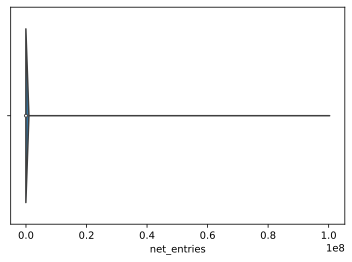

In [17]:
sns.violinplot(x=df.net_entries);

In [18]:
q = np.nanquantile(df["net_entries"], .95)
df = df[df["net_entries"] < q]

q2 = np.nanquantile(df["net_exits"], .95)
df = df[df["net_exits"] < q2]

q3 = np.nanquantile(df['net_traffic'], .95)
df=df[df['net_traffic'] < q3]

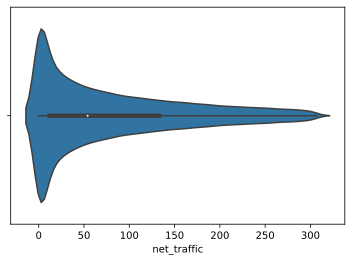

In [19]:
sns.violinplot(data=df, x='net_traffic');

In [20]:
df.head(20)

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time,net_entries,net_exits,net_traffic
unique_id,,,,,,,,,,,,,,,
A002_R051_02_00_00_59_ST_12_18_2021_07_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_18_2021,07_00_00,REGULAR,7672969,2645040,2021-12-18 07:00:00,3.0,17.0,20.0
A002_R051_02_00_00_59_ST_12_18_2021_11_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_18_2021,11_00_00,REGULAR,7672991,2645127,2021-12-18 11:00:00,22.0,87.0,109.0
A002_R051_02_00_00_59_ST_12_18_2021_15_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_18_2021,15_00_00,REGULAR,7673037,2645193,2021-12-18 15:00:00,46.0,66.0,112.0
A002_R051_02_00_00_59_ST_12_18_2021_19_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_18_2021,19_00_00,REGULAR,7673097,2645270,2021-12-18 19:00:00,60.0,77.0,137.0
A002_R051_02_00_00_59_ST_12_18_2021_23_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_18_2021,23_00_00,REGULAR,7673128,2645283,2021-12-18 23:00:00,31.0,13.0,44.0
A002_R051_02_00_00_59_ST_12_19_2021_03_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_19_2021,03_00_00,REGULAR,7673141,2645289,2021-12-19 03:00:00,13.0,6.0,19.0
A002_R051_02_00_00_59_ST_12_19_2021_07_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_19_2021,07_00_00,REGULAR,7673146,2645299,2021-12-19 07:00:00,5.0,10.0,15.0
A002_R051_02_00_00_59_ST_12_19_2021_11_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_19_2021,11_00_00,REGULAR,7673153,2645360,2021-12-19 11:00:00,7.0,61.0,68.0
A002_R051_02_00_00_59_ST_12_19_2021_15_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_19_2021,15_00_00,REGULAR,7673179,2645407,2021-12-19 15:00:00,26.0,47.0,73.0


In [21]:
df.net_entries.isna().sum()

0

In [22]:
df['audit_length_hours'] = df.groupby(['control_area', 'unit', 'subunit_channel_pos', 'station'])['date_time'].transform(lambda x: x.diff())

In [23]:
df['audit_length_hours'] = df.audit_length_hours.dt.total_seconds() / 3600

In [24]:
df.audit_length_hours.value_counts()

 4.000000      174862
 4.200000       10567
 8.000000        6905
 16.000000       3544
 12.000000       2608
                ...  
 25.200000          1
 4.032222           1
 4.134444           1
 4.084167           1
-200.000000         1
Name: audit_length_hours, Length: 291, dtype: int64

In [25]:
df.head(20)

,control_area,unit,subunit_channel_pos,station,subway_lines,division,date,time,desc,entries,exits,date_time,net_entries,net_exits,net_traffic,audit_length_hours
unique_id,,,,,,,,,,,,,,,,
A002_R051_02_00_00_59_ST_12_18_2021_07_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_18_2021,07_00_00,REGULAR,7672969,2645040,2021-12-18 07:00:00,3.0,17.0,20.0,NaN
A002_R051_02_00_00_59_ST_12_18_2021_11_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_18_2021,11_00_00,REGULAR,7672991,2645127,2021-12-18 11:00:00,22.0,87.0,109.0,4.0
A002_R051_02_00_00_59_ST_12_18_2021_15_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_18_2021,15_00_00,REGULAR,7673037,2645193,2021-12-18 15:00:00,46.0,66.0,112.0,4.0
A002_R051_02_00_00_59_ST_12_18_2021_19_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_18_2021,19_00_00,REGULAR,7673097,2645270,2021-12-18 19:00:00,60.0,77.0,137.0,4.0
A002_R051_02_00_00_59_ST_12_18_2021_23_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_18_2021,23_00_00,REGULAR,7673128,2645283,2021-12-18 23:00:00,31.0,13.0,44.0,4.0
A002_R051_02_00_00_59_ST_12_19_2021_03_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_19_2021,03_00_00,REGULAR,7673141,2645289,2021-12-19 03:00:00,13.0,6.0,19.0,4.0
A002_R051_02_00_00_59_ST_12_19_2021_07_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_19_2021,07_00_00,REGULAR,7673146,2645299,2021-12-19 07:00:00,5.0,10.0,15.0,4.0
A002_R051_02_00_00_59_ST_12_19_2021_11_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_19_2021,11_00_00,REGULAR,7673153,2645360,2021-12-19 11:00:00,7.0,61.0,68.0,4.0
A002_R051_02_00_00_59_ST_12_19_2021_15_00_00_REGULAR,A002,R051,02_00_00,59_ST,NQR456W,BMT,12_19_2021,15_00_00,REGULAR,7673179,2645407,2021-12-19 15:00:00,26.0,47.0,73.0,4.0


In [26]:
df.dtypes

control_area                   object
unit                           object
subunit_channel_pos            object
station                        object
subway_lines                   object
division                       object
date                           object
time                           object
desc                           object
entries                         int64
exits                           int64
date_time              datetime64[ns]
net_entries                   float64
net_exits                     float64
net_traffic                   float64
audit_length_hours            float64
dtype: object

In [27]:
df['day_of_week'] = df.date_time.dt.dayofweek

In [28]:
df['pct_change'] = df.groupby(['control_area', 'unit', 'subunit_channel_pos', 'station'])['net_traffic'].transform(lambda x: x.pct_change())
df['pct_change'] = df['pct_change'].astype(float).map("{:.2%}".format)



In [36]:
df.sample(20)

,station,subway_lines,date,time,entries,exits,date_time,net_entries,net_exits,net_traffic,audit_length_hours,day_of_week,pct_change
unique_id,,,,,,,,,,,,,
D016_R397_00_03_01_86_ST_12_21_2021_16_00_00_REGULAR,86_ST,N,12_21_2021,16_00_00,654795,265007,2021-12-21 16:00:00,88.0,25.0,113.0,4.0,1,-5.83%
N544_R289_01_06_00_FT_HAMILTON_PKY_12_24_2021_04_00_00_REGULAR,FT_HAMILTON_PKY,FG,12_24_2021,04_00_00,2920186,241843,2021-12-24 04:00:00,0.0,0.0,0.0,4.0,4,-100.00%
H041_R152_00_00_02_CANARSIE_ROCKAW_12_17_2021_12_00_00_REGULAR,CANARSIE_ROCKAW,L,12_17_2021,12_00_00,18279790,5580438,2021-12-17 12:00:00,164.0,21.0,185.0,4.0,4,0.00%
A071_R044_02_00_00_CHAMBERS_ST_12_11_2021_23_00_00_REGULAR,CHAMBERS_ST,JZ456,12_11_2021,23_00_00,185618,107231,2021-12-11 23:00:00,2.0,2.0,4.0,4.0,5,-71.43%
R532H_R328_02_00_00_METS_WILLETS_PT_12_23_2021_20_00_00_REGULAR,METS_WILLETS_PT,7,12_23_2021,20_00_00,103825,151686,2021-12-23 20:00:00,0.0,0.0,0.0,4.0,3,nan%
PTH19_R549_02_00_03_NEWARK_C_12_18_2021_23_16_16_REGULAR,NEWARK_C,1,12_18_2021,23_16_16,94184,12620,2021-12-18 23:16:16,0.0,0.0,0.0,4.2,5,nan%
R532_R328_00_05_00_METS_WILLETS_PT_12_24_2021_08_00_00_REGULAR,METS_WILLETS_PT,7,12_24_2021,08_00_00,2398490,915309,2021-12-24 08:00:00,0.0,0.0,0.0,4.0,4,nan%
R155_R116_01_00_04_50_ST_12_22_2021_11_00_00_REGULAR,50_ST,1,12_22_2021,11_00_00,5802916,2131930,2021-12-22 11:00:00,30.0,28.0,58.0,4.0,2,544.44%
R134_R272_01_00_00_28_ST_12_19_2021_08_00_00_REGULAR,28_ST,1,12_19_2021,08_00_00,181052,603027,2021-12-19 08:00:00,5.0,22.0,27.0,4.0,6,22.73%


In [30]:
df = df.drop(labels=['control_area', 'unit', 'subunit_channel_pos', 'division', 'desc'], axis=1)

In [31]:
df.head()

,station,subway_lines,date,time,entries,exits,date_time,net_entries,net_exits,net_traffic,audit_length_hours,day_of_week,pct_change
unique_id,,,,,,,,,,,,,
A002_R051_02_00_00_59_ST_12_18_2021_07_00_00_REGULAR,59_ST,NQR456W,12_18_2021,07_00_00,7672969,2645040,2021-12-18 07:00:00,3.0,17.0,20.0,NaN,5,nan%
A002_R051_02_00_00_59_ST_12_18_2021_11_00_00_REGULAR,59_ST,NQR456W,12_18_2021,11_00_00,7672991,2645127,2021-12-18 11:00:00,22.0,87.0,109.0,4.0,5,445.00%
A002_R051_02_00_00_59_ST_12_18_2021_15_00_00_REGULAR,59_ST,NQR456W,12_18_2021,15_00_00,7673037,2645193,2021-12-18 15:00:00,46.0,66.0,112.0,4.0,5,2.75%
A002_R051_02_00_00_59_ST_12_18_2021_19_00_00_REGULAR,59_ST,NQR456W,12_18_2021,19_00_00,7673097,2645270,2021-12-18 19:00:00,60.0,77.0,137.0,4.0,5,22.32%
A002_R051_02_00_00_59_ST_12_18_2021_23_00_00_REGULAR,59_ST,NQR456W,12_18_2021,23_00_00,7673128,2645283,2021-12-18 23:00:00,31.0,13.0,44.0,4.0,5,-67.88%


In [32]:
df.net_entries.isna().sum()

0

In [38]:
station_geo = pd.read_csv('/Users/nathanieldirenzo/Documents/GitHub/NYC_MTA_EDA_Project/body.csv')
station_geo.head()

,ogc_fid,station_id,complex_id,gtfs_stop_id,division,line,stop_name,borough,daytime_routes,structure,gtfs_latitude,gtfs_longitude,north_direction_label,south_direction_label
0,1,1.0,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
1,2,2.0,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
2,3,3.0,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
3,4,4.0,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
4,5,5.0,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


In [41]:
station_geo['stop_name'] = station_geo['stop_name'].str.replace('-', '')
station_geo['stop_name'] = station_geo['stop_name'].str.replace(' - ', '_')
station_geo['stop_name'] = station_geo['stop_name'].str.replace('/','_')
station_geo['stop_name'] = station_geo['stop_name'].str.replace(' ','_')

In [42]:
station_geo.stop_name.tolist()

['Astoria__Ditmars_Blvd',
 'Astoria_Blvd',
 '30_Av',
 'Broadway',
 '36_Av',
 '39_Av',
 'Lexington_Av_59_St',
 '5_Av_59_St',
 '57_St__7_Av',
 '49_St',
 'Times_Sq__42_St',
 '34_St__Herald_Sq',
 '28_St',
 '23_St',
 '14_St__Union_Sq',
 '8_St__NYU',
 'Prince_St',
 'Canal_St',
 'Canal_St',
 'City_Hall',
 'Cortlandt_St',
 'Rector_St',
 'Whitehall_St',
 'Court_St',
 'Jay_St__MetroTech',
 'DeKalb_Av',
 'Atlantic_Av__Barclays_Ctr',
 'Union_St',
 '9_St',
 'Prospect_Av',
 '25_St',
 '36_St',
 '45_St',
 '53_St',
 '59_St',
 'Bay_Ridge_Av',
 '77_St',
 '86_St',
 'Bay_Ridge__95_St',
 'Atlantic_Av__Barclays_Ctr',
 '7_Av',
 'Prospect_Park',
 'Parkside_Av',
 'Church_Av',
 'Beverley_Rd',
 'Cortelyou_Rd',
 'Newkirk_Plaza',
 'Avenue_H',
 'Avenue_J',
 'Avenue_M',
 'Kings_Hwy',
 'Avenue_U',
 'Neck_Rd',
 'Sheepshead_Bay',
 'Brighton_Beach',
 'Ocean_Pkwy',
 'W_8_St__NY_Aquarium',
 'Coney_Island__Stillwell_Av',
 '9_Av',
 'Fort_Hamilton_Pkwy',
 '50_St',
 '55_St',
 '62_St',
 '71_St',
 '79_St',
 '18_Av',
 '20_Av',
 '

In [ ]:
hourly_df = df.groupby(pd.Grouper(key='date_time', freq='H'))[['net_traffic']].mean()
hourly_df['pct_change'] = hourly_df.net_traffic.pct_change()
hourly_df

In [ ]:
hourly_df.plot(subplots=True);

In [ ]:
daily_df = df.groupby(df.day_of_week)[['net_traffic']].sum()
daily_df['pct_change'] = daily_df.net_traffic.pct_change()
daily_df['pct_change'].iloc[0] = ((daily_df.net_traffic.iloc[0] - daily_df.net_traffic.iloc[6]) / daily_df.net_traffic.iloc[6])
daily_df

In [ ]:
daily_df.plot(subplots=True);
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45)
plt.xlabel('Day of Week');
plt.ylabel('Daily Traffic');
plt.title('Subway System Traffic by Weekday');


In [ ]:
station_daily = df.groupby(["station", pd.Grouper(key='date_time', freq='D')])[['net_traffic', 'date_time']].sum().sort_values(by=['station']).reset_index()
station_daily

In [ ]:
station_daily['day_of_week'] = station_daily.date_time.dt.dayofweek

In [ ]:
station_daily['pct_change'] = station_daily.groupby(['station'])['net_traffic'].apply(lambda x: x.pct_change())

In [ ]:
station_daily

In [ ]:
station_daily['pct_change'] = station_daily['pct_change'].astype(float).map("{:.2%}".format)

In [ ]:
#new_df = old_df.groupby(['column1', 'column2']).agg({'column1':'first','column2':'first', 'column3':'mean', 'column4':'sum'})
station_daily

In [ ]:
station_monthly = station_daily.groupby(['station', pd.Grouper(key='date_time', freq='BM')])[['net_traffic']].sum().sort_values(by = 'net_traffic', ascending=False).reset_index()
station_monthly

In [ ]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile

In [ ]:
df.station.nunique()

In [ ]:
top_stations = df.groupby('station')[['net_traffic']].sum().sort_values(by='net_traffic', ascending=False)
top_stations['pct_total'] = top_stations['net_traffic'].apply(lambda x: x / top_stations.net_traffic.sum())
top_stations.head(20)

In [ ]:
top_stations.plot(subplots=True, kind='bar',figsize=(20,10));

In [ ]:
nta_map = gpd.read_file('/Users/nathanieldirenzo/Documents/GitHub/NYC_MTA_EDA_Project/nynta2020.shp')
nta_map.head()
nta_map.to_crs(4326, inplace=True)
nta_map.crs

In [ ]:
fig,ax = plt.subplots(figsize=(15,15))
nta_map.plot(ax=ax);

In [ ]:
station_df = gpd.read_file('Subway Stations.geojson')
len(station_df)

In [ ]:
df.station.value_counts()

In [ ]:
station_df.name = station_df.name.str.replace(' - ', '_')
station_df.name = station_df.name.str.replace(' ', '_')
station_df.name = station_df.name.str.replace('(', '')
station_df.name = station_df.name.str.replace(')', '')
station_df.name = station_df.name.str.replace('/', '')
station_df.name = station_df.name.str.replace('', '')
station_df

In [ ]:
station_df.to_crs(4326, inplace=True)

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
station_df.plot(ax=ax, markersize=20, color='blue', marker='o', label = 'Station')

In [ ]:
fig,ax = plt.subplots(figsize=(20,20))
nta_map.plot(ax=ax);
station_df.plot(ax=ax, markersize=20, color='red', marker='o', label = 'Station');